# German Credit Data


## 1. Libraries

In [1]:
%pip install ucimlrepo pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 35.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.0 MB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 24.2 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 34.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 42.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 55.6 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 53.3 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 34.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## 2. Setup

In [2]:
### Importing libraries _______________________________________________________
# German Credit Data
from ucimlrepo import fetch_ucirepo

# Python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

### Fetching dataframes _______________________________________________________
# Fetch dataset 
german_credit = fetch_ucirepo(id=144)

# Features df
X = german_credit.data.features

# Target df
y = german_credit.data.targets
y.columns = ['Target']

In [34]:
german_credit.data.original.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## 3. The dataset

> There are 20 features and 1 target.<br>
> 1000 observations.

> The author provides a table and an additional description for the variables.

In [14]:
# Author's table for a succint variables description
german_credit.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


### Additional Variable Information
legend = {Q: qualitative, N: numerical}

1:Q - Status of existing checking account<br>
> NOTE Deutsche Marks were in vogue when the dataset was donated (11/16/1994).<br>
> According to [destatis.de](https://www.destatis.de/EN/Themes/Labour/Earnings/Earnings-Earnings-Differences/Tables/liste-average-gross-monthly-earnings.html#56290) the average monthly earnings where {total: 2.185, men: 2.370, women: 1.774}

- A11 :      ... <    0 DM<br>
- A12 : 0 <= ... <  200 DM<br>
- A13 :      ... >= 200 DM / salary assignments for at least 1 year<br>
- A14 : no checking account<br>

2:N - Duration<br>
> Since there are some rows where the loaner does not have a checking account (Attribute1 = A14) AND<br>
> there is still some values in the duration column (Attribute2 > 0),<br>
> then Attribute2 is more likely to represent a `loan duration`, wther if it is the last or actual loan.

- Duration in month

3:Q - Credit history<br>	      
- A30 : no credits taken/ all credits paid back duly<br>
- A31 : all credits at this bank paid back duly<br>
- A32 : existing credits paid back duly till now<br>
- A33 : delay in paying off in the past<br>
- A34 : critical account/  other credits existing (not at this bank)<br>

4:Q - Purpose<br>	
- A40 : car (new)<br>
- A41 : car (used)<br>
- A42 : furniture/equipment<br>
- A43 : radio/television<br>
- A44 : domestic appliances<br>
- A45 : repairs<br>
- A46 : education<br>
- A47 : (vacation - does not exist?)<br>
- A48 : retraining<br>
- A49 : business<br>
- A410 : others<br>

5:N - Credit amount<br>
> Requested credit

6:Q - Savings account/bonds<br>
- A61 :          ... <  100 DM<br>
- A62 :   100 <= ... <  500 DM<br>
- A63 :   500 <= ... < 1000 DM<br>
- A64 :          .. >= 1000 DM<br>
- A65 :   unknown/ no savings account<br>

7:Q - Present employment since<br>
- A71 : unemployed<br>
- A72 :       ... < 1 year<br>
- A73 : 1  <= ... < 4 years<br> 
- A74 : 4  <= ... < 7 years<br>
- A75 :       .. >= 7 years<br>

8:N - Installment rate in percentage of disposable income
> How much of an applicant's income is burdened to pay the loan.

9:Q - Personal status and sex<br>
- A91 : male   : divorced/separated<br>
- A92 : female : divorced/separated/married<br>
- A93 : male   : single<br>
- A94 : male   : married/widowed<br>
- A95 : female : single<br>

10:Q - Other debtors / guarantors<br>
- A101 : none<br>
- A102 : co-applicant<br>
- A103 : guarantor<br>

11:N - Present residence since<br>

12:Q - Property<br>
- A121 : real estate<br>
- A122 : if not A121 : building society savings agreement/ life insurance<br>
- A123 : if not A121/A122 : car or other, not in attribute 6<br>
- A124 : unknown / no property<br>

13:N - Age in years<br>

14:Q - Other installment plans<br>
> Does the loaner have any other debts ?

- A141 : bank<br>
- A142 : stores<br>
- A143 : none<br>

15:Q - Housing<br>
- A151 : rent<br>
- A152 : own<br>
- A153 : for free<br>

16:N - Number of existing credits at this bank<br>

17:Q - Job<br>
- A171 : unemployed/ unskilled  - non-resident<br>
- A172 : unskilled - resident<br>
- A173 : skilled employee / official<br>
- A174 : management/ self-employed/highly qualified employee/ officer<br>

18:N - Number of people being liable to provide maintenance for<br>
> Dependents

19:Q - Telephone<br>
- A191 : none<br>
- A192 : yes, registered under the customers name<br>

20:Q - foreign worker<br>
- A201 : yes<br>
- A202 : no<br>

## 4. Duplicates

In [55]:
# Complete duplicates
dupe_atall = X[X.duplicated()]
dupe_atall.sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
dtype: object

> There are no complete duplicates as seen above ...

> But when there are duplicates when we project only the demographic features along the target (7 columns):

In [68]:
# Duplicates in the demographic variables
demographic = ['Attribute7', 'Attribute9', 'Attribute13', 'Attribute15', 'Attribute17', 'Attribute20', 'class']

original = german_credit.data.original
dupe_demo = original[original.duplicated(demographic)]
dupe_demo

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
16,A14,24,A34,A43,2424,A65,A75,4,A93,A101,...,A122,53,A143,A152,2,A173,1,A191,A201,1
51,A12,27,A33,A41,5965,A61,A75,1,A93,A101,...,A123,30,A143,A152,2,A174,1,A192,A201,1
78,A14,54,A30,A41,9436,A65,A73,2,A93,A101,...,A122,39,A143,A152,1,A172,2,A191,A201,1
94,A12,12,A32,A40,1318,A64,A75,4,A93,A101,...,A121,54,A143,A152,1,A173,1,A192,A201,1
97,A12,18,A32,A49,2622,A62,A73,4,A93,A101,...,A123,34,A143,A152,1,A173,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,A11,36,A32,A41,8229,A61,A73,2,A93,A101,...,A122,26,A143,A152,1,A173,2,A191,A201,2
990,A14,12,A34,A46,3565,A65,A72,2,A93,A101,...,A122,37,A143,A152,2,A172,2,A191,A201,1
992,A11,18,A32,A43,1936,A65,A74,2,A94,A101,...,A123,23,A143,A151,2,A172,1,A191,A201,1
994,A14,12,A32,A40,2390,A65,A75,4,A93,A101,...,A123,50,A143,A152,1,A173,1,A192,A201,1


In [69]:
# An instance of the duplicated rows in the demographic variables
cond1 = original['Attribute7'] == 'A75'
cond2 = original['Attribute9'] == 'A93'
cond3 = original['Attribute13'] == 53
cond4 = original['Attribute15'] == 'A152'
cond5 = original['Attribute17'] == 'A173'
cond6 = original['Attribute20'] == 'A201'
cond7 = original['class'] == 1


original[cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7]

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
16,A14,24,A34,A43,2424,A65,A75,4,A93,A101,...,A122,53,A143,A152,2,A173,1,A191,A201,1


> This suggests that the dataset models **loans** instead of **loaners**

> I am checking with the ml-repository@uci support at the moment if there is any info about the primary key for this dataset.

## 5. Explore

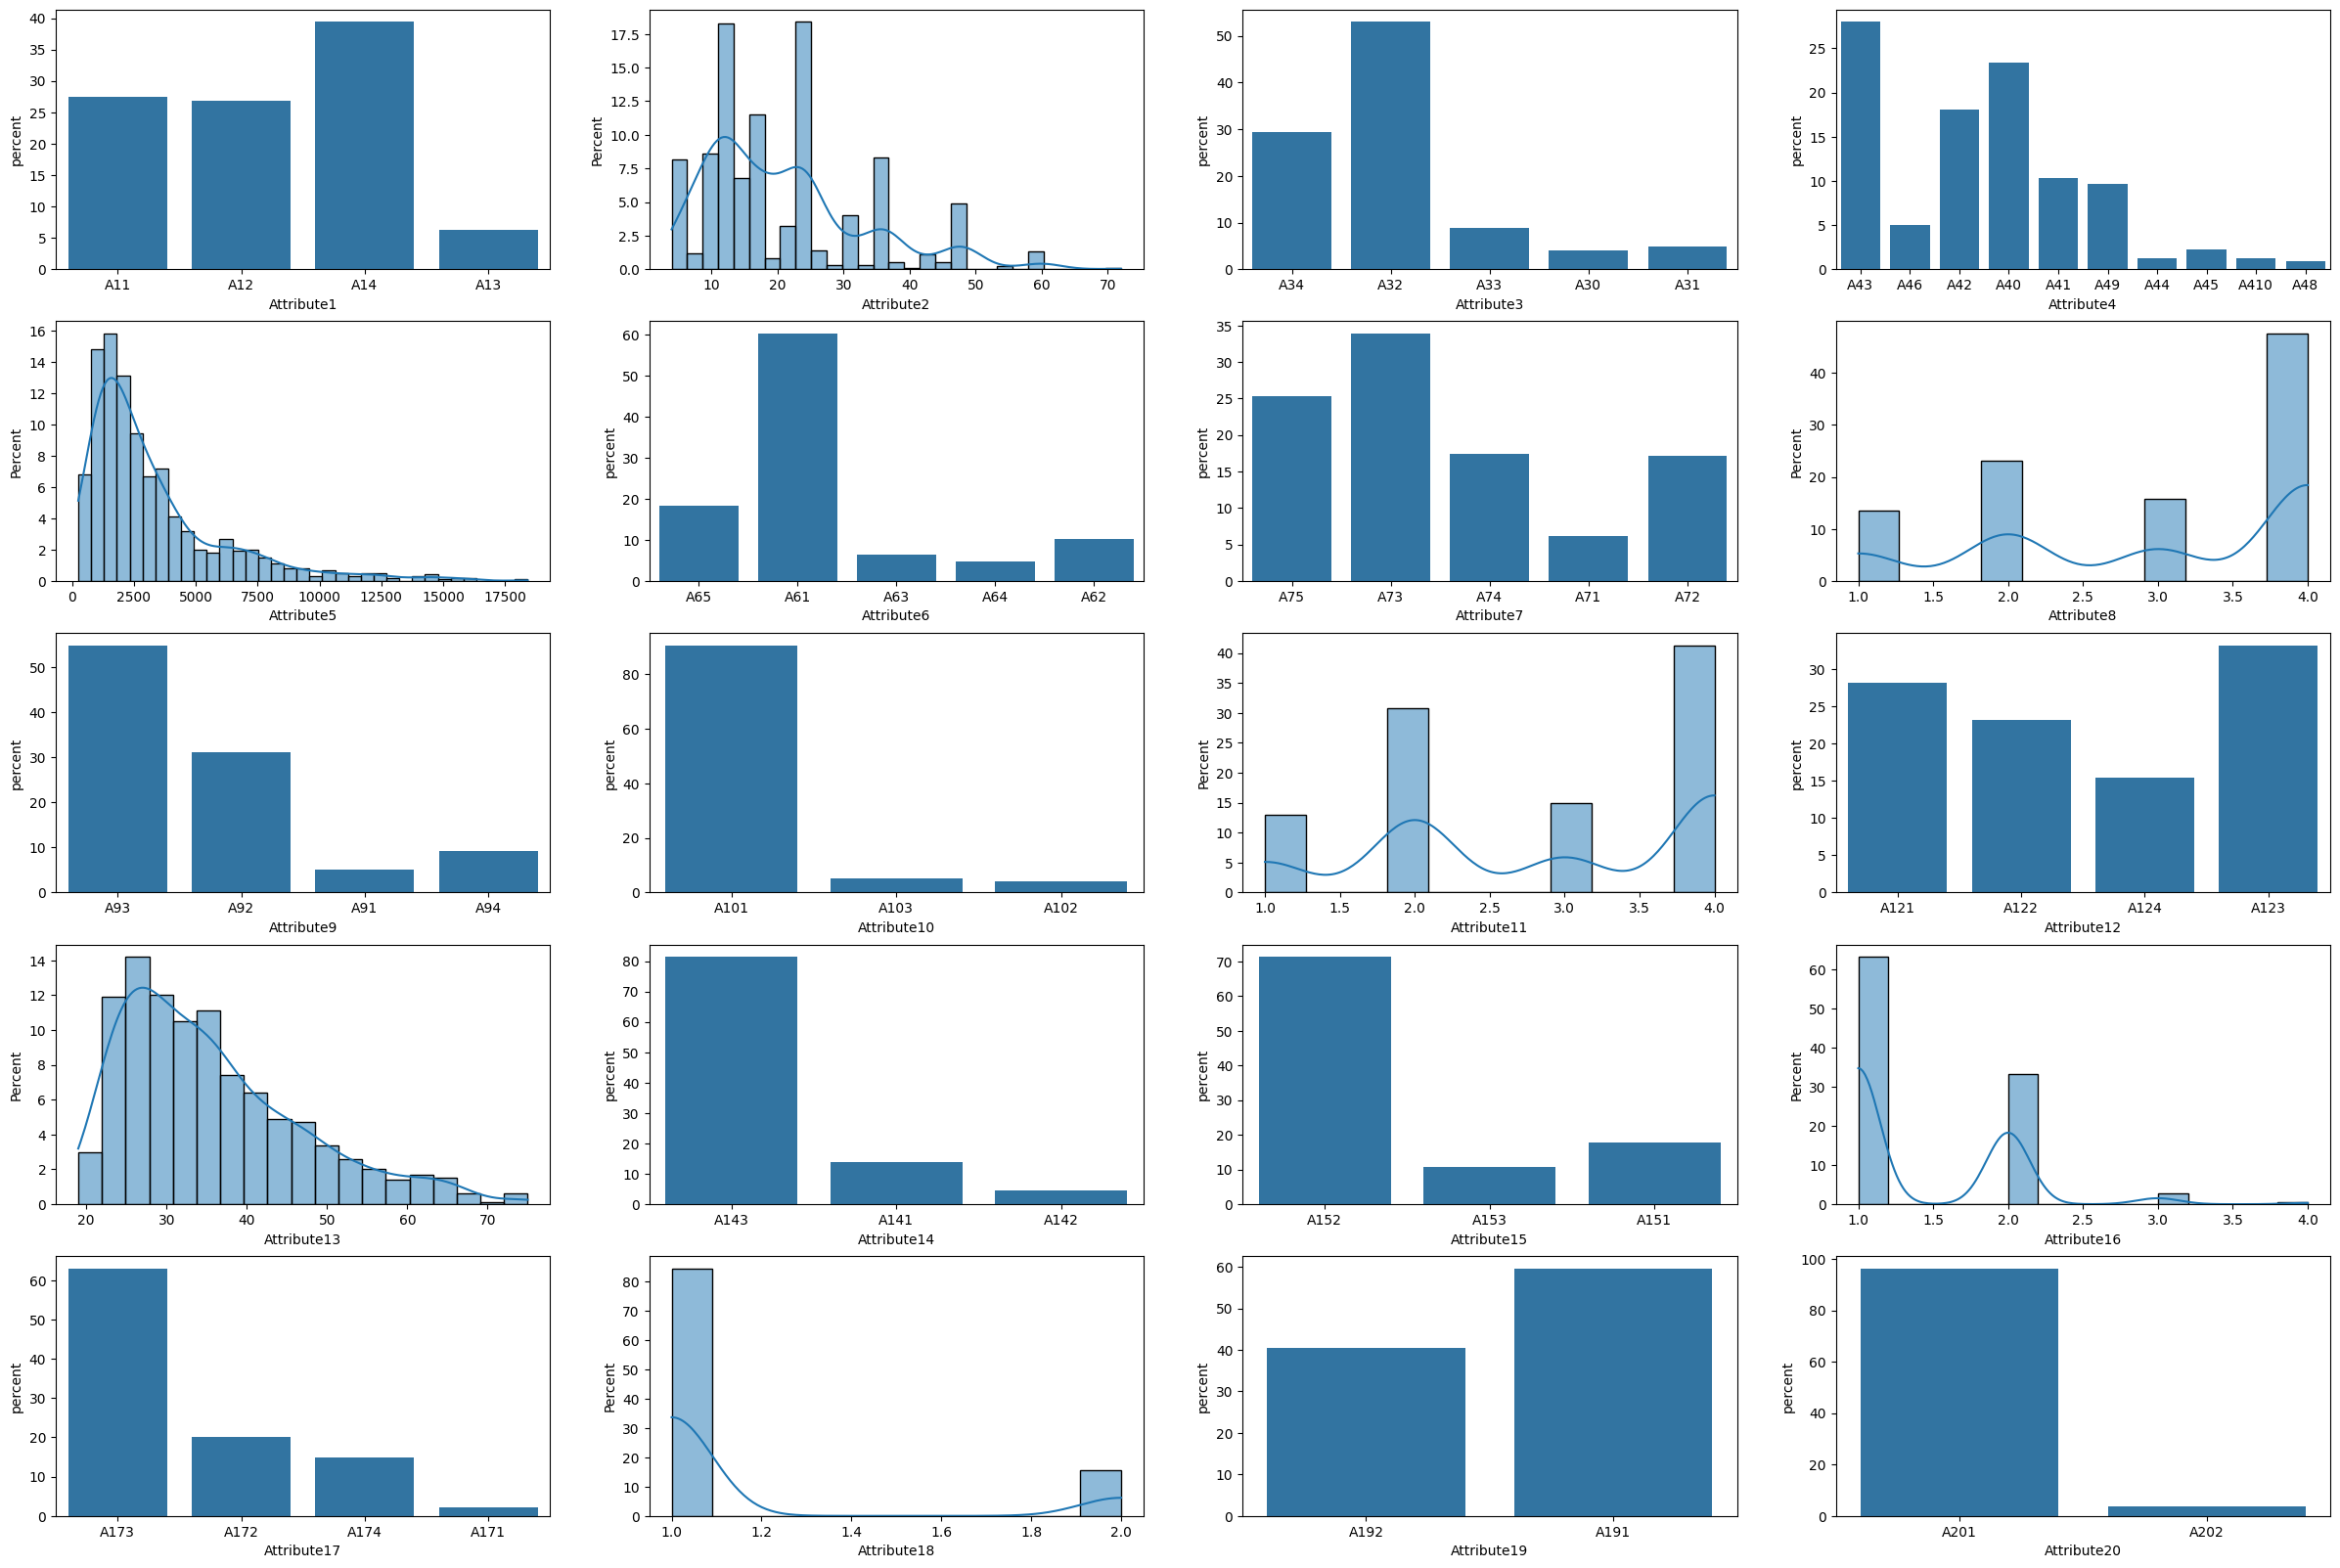

In [32]:
# Features distributions
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 20))
axes = axes.flatten()

for i, feat in enumerate(X.columns):
    if X[feat].dtype == 'int64':
        sns.histplot(X[feat], kde=True, stat='percent', ax=axes[i])
    else:
        sns.countplot(x=feat, data=X, stat='percent', ax=axes[i])

<Axes: xlabel='Target', ylabel='percent'>

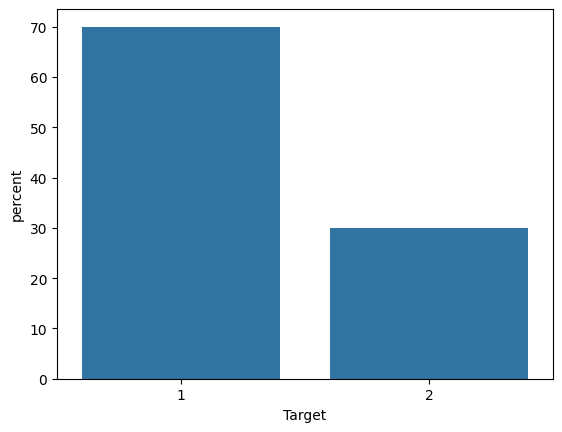

In [27]:
# Target distribution
sns.countplot(y, x='Target', order=sorted(y.Target.unique()), stat='percent')